# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data to DataFrame
data=pd.read_csv('DATA/TargetedMailing.csv')
data.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,FirstPurchaseYear,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,Country,Buyer
0,M,M,90000.0,2,2011,0,Bachelors,Professional,1,0,1-2 Miles,46,AU,1
1,S,M,60000.0,3,2011,3,Bachelors,Professional,0,1,0-1 Miles,42,AU,1
2,M,M,60000.0,3,2011,3,Bachelors,Professional,1,1,2-5 Miles,47,AU,1
3,S,F,70000.0,0,2010,0,Bachelors,Professional,0,1,5-10 Miles,45,AU,1
4,S,F,80000.0,5,2011,5,Bachelors,Professional,1,4,1-2 Miles,39,AU,1


In [3]:
# Missing values
data.isnull().sum()

MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
FirstPurchaseYear       0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
CommuteDistance         0
Age                     0
Country                 0
Buyer                   0
dtype: int64

In [4]:
# Data types
print(data.dtypes)

MaritalStatus            object
Gender                   object
YearlyIncome            float64
TotalChildren             int64
FirstPurchaseYear         int64
NumberChildrenAtHome      int64
Education                object
Occupation               object
HouseOwnerFlag            int64
NumberCarsOwned           int64
CommuteDistance          object
Age                       int64
Country                  object
Buyer                     int64
dtype: object


In [5]:
# Categorical and Numerical variables
data.Buyer=data.Buyer.astype(object) # set Buyer as object

cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols=data.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical variables:',cat_cols)
print('Numerical variables:',num_cols)

Categorical variables: ['MaritalStatus', 'Gender', 'Education', 'Occupation', 'CommuteDistance', 'Country', 'Buyer']
Numerical variables: ['YearlyIncome', 'TotalChildren', 'FirstPurchaseYear', 'NumberChildrenAtHome', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age']


In [6]:
# Number of unique values in categoriacal variable
print('Unique values in categoriacal variables:\n')
for cat in cat_cols:
    print(cat,':', data[cat].nunique())

Unique values in categoriacal variables:

MaritalStatus : 2
Gender : 2
Education : 5
Occupation : 5
CommuteDistance : 5
Country : 6
Buyer : 2


In [7]:
# Overall view
data.describe()

,YearlyIncome,TotalChildren,FirstPurchaseYear,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,57305.777970,1.844352,2012.610853,1.004058,0.676369,1.502705,48.784300
std,32285.841703,1.612408,0.732673,1.522660,0.467874,1.138394,11.519584
min,10000.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,32.000000
25%,30000.000000,0.000000,2012.000000,0.000000,0.000000,1.000000,39.000000
50%,60000.000000,2.000000,2013.000000,0.000000,1.000000,2.000000,47.000000
75%,70000.000000,3.000000,2013.000000,2.000000,1.000000,2.000000,56.000000
max,170000.000000,5.000000,2014.000000,5.000000,1.000000,4.000000,102.000000


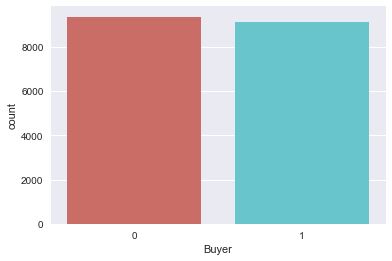

In [8]:
# plot Buyer counts 
sns.countplot(x='Buyer',data=data, palette='hls');

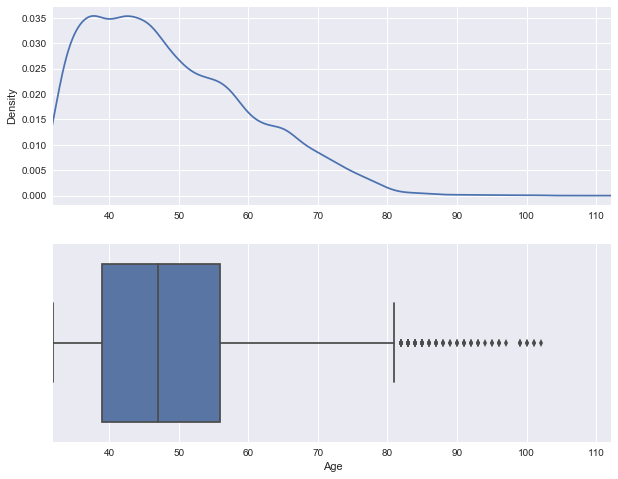

In [9]:
# plot Age: KDE and Box
plt.figure(figsize=(10,8))

plt.subplot(211)
plt.xlim(data['Age'].min(), data['Age'].max()*1.1)
data['Age'].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data['Age'].min(), data['Age'].max()*1.1)
sns.boxplot(x=data['Age'])

In [10]:
# remove Age outliers with log transformation / 1.5*IQR rule
q75, q25 = np.percentile(np.log(data['Age']), [75 ,25]) # get Q1 and Q3
iqr = q75 - q25 # interquartile range
 
max = q75 + (iqr*1.5)

RTM=data.Age[np.log(data['Age'])>max].index # rows to remove

print('Removed',len(RTM),'rows with ages:',data.Age[RTM].values.tolist())

data=data.drop(RTM) # remove data

Removed 9 rows with ages: [102, 101, 100, 99, 101, 99, 100, 99, 97]


In [11]:
# numerical variables by output Buyer
data.groupby('Buyer').mean()

,YearlyIncome,TotalChildren,FirstPurchaseYear,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age
Buyer,,,,,,,
0,55954.190303,2.046238,2013.054158,1.135610,0.673231,1.706197,49.942310
1,58728.646518,1.636881,2012.156921,0.870456,0.679917,1.294350,47.549277


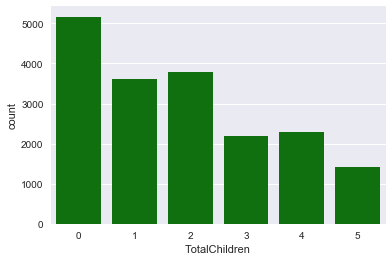

In [12]:
# plot TotalChildren counts
sns.countplot(x='TotalChildren', data=data, color='g')

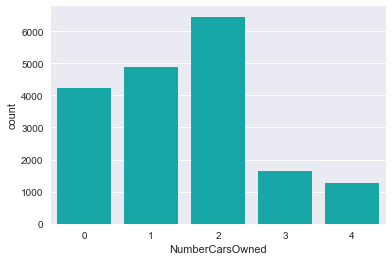

In [13]:
# plot NumberCarsOwned counts
sns.countplot(x='NumberCarsOwned', data=data, color='c')

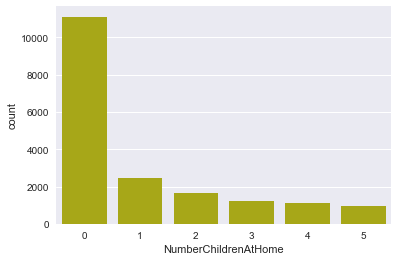

In [14]:
# plot NumberChildrenAtHome counts
sns.countplot(x='NumberChildrenAtHome', data=data, color='y')

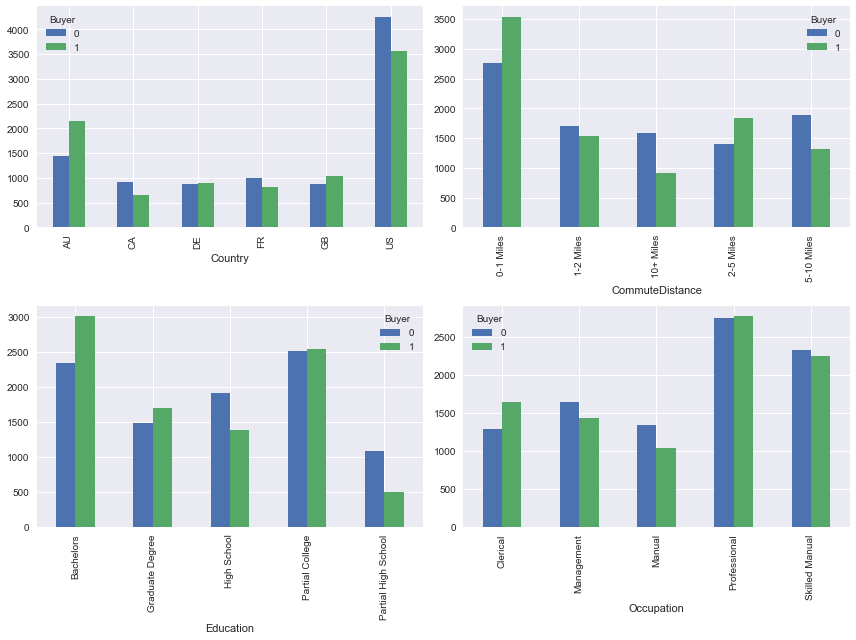

In [15]:
# plot Buyers counts by some categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
pd.crosstab(data.Country, data.Buyer).plot(kind='bar', ax=axes[0,0])
pd.crosstab(data.CommuteDistance, data.Buyer).plot(kind='bar', ax=axes[0,1])
pd.crosstab(data.Education, data.Buyer).plot(kind='bar', ax=axes[1,0])
pd.crosstab(data.Occupation, data.Buyer).plot(kind='bar', ax=axes[1,1])
plt.tight_layout();

In [16]:
# create dummy variables for correlation matrix
for cat in cat_cols:
    cat_list = 'var_'+cat
    cat_list = pd.get_dummies(data[cat], prefix=cat, drop_first='True')
    data_dummy=data.join(cat_list)
    data=data_dummy

keep_cols=[x for x in data.columns.tolist() if x not in cat_cols]
data=data[keep_cols]
data.head()

,YearlyIncome,TotalChildren,FirstPurchaseYear,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,MaritalStatus_S,Gender_M,Education_Graduate Degree,...,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,Country_CA,Country_DE,Country_FR,Country_GB,Country_US,Buyer_1
0,90000.0,2,2011,0,1,0,46,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,60000.0,3,2011,3,0,1,42,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,60000.0,3,2011,3,1,1,47,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,70000.0,0,2010,0,0,1,45,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,80000.0,5,2011,5,1,4,39,1,0,0,...,1,0,0,0,0,0,0,0,0,1


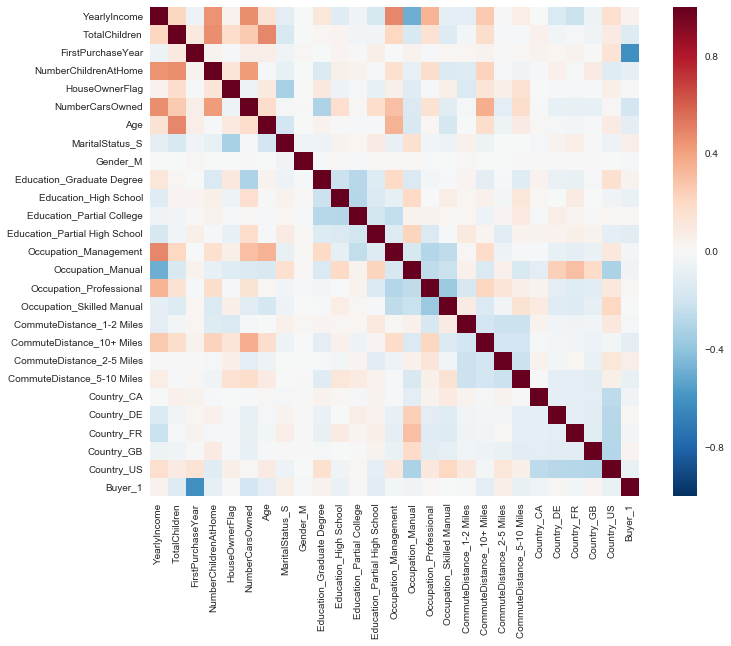

In [17]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);